In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB' ,'CO2EMISSIONS' ]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


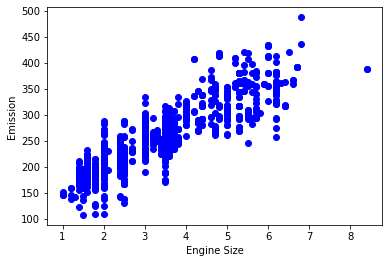

In [5]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [8]:
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [9]:
print(train_x[:3])

[[2. ]
 [2.4]
 [1.5]]


In [10]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly , train_y)
print('Coefficients: ',clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.58548556 -1.58074682]]
Intercept:  [107.4831855]


Text(0, 0.5, 'Emission')

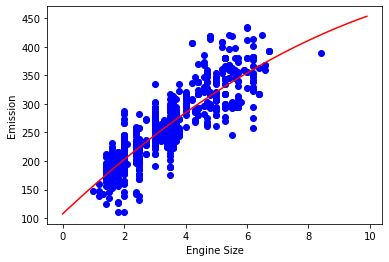

In [11]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'blue')
xx = np.arange(0.0 , 10.0 , 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*xx +clf.coef_[0][2]*np.power(xx , 2)
plt.plot(xx , yy , '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')


In [12]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error : %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE) : %.2f" %np.mean((test_y_ - test_y)**2))
print("R2_score : %.2f" %r2_score(test_y , test_y_))

Mean absolute error : 26.29
Residual sum of squares (MSE) : 1133.57
R2_score : 0.76
